# 다중 선형 회귀

- 수치형 설명변수 x와 연속형 숫자로 이뤄진 종속변수 y간의 관계를 선형으로 가정하고 이를 가장 잘 표현할 수 있는 회귀 계수를 데이터로부터 추정하는 모델. 

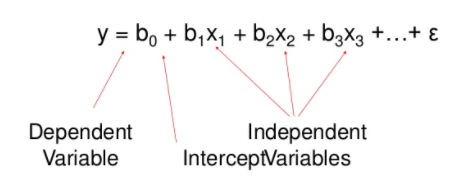

y는 종속변수, 즉 아파트 가격을 뜻하고, X1,X2,X3...은 방 갯, 방 크기, 주변 학군 등의 독립변수를 의미, 그리고 b0,b1,b2...은 독립변수의 값에 영향을 미치는 회귀 계수. 머신러닝 관점에서 보면 독립변수는 피처에 해당하며 종속변수는 결정 값. 머신러닝 회귀 예측의 핵심은 **주어진 피처와 결정값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것.** 

회귀에서 가장 중요한 것은 **회귀 계수**. 이 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있다. 그리고 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉜다.

# 2. 단순 선형 회귀를 통한 회귀 이해

단순선형회귀는 독립변수도 하나 종속변수도 하나인 회귀이다. 

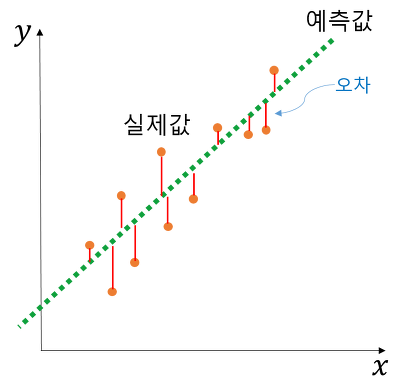

1차 함수로 모델링했다면 실제 값은 1차 함수 값에서 실제값만큼의 오류 값을 뺸(또는 더한) 값이 된다. 

`잔차 : 실제값-회귀모델`

최적의 회귀 모델을 만든다는 것은 바로 **전체 데이터의 잔차 합이 최소가 되는 모델을 만드는 것**. 동시에 **오류 값 합이 최소가 될 수 있는** 최적의 회귀 계수를 찾는 다는 의미도 된다. 

오류의 합을 구할 때는 보통, **절댓값을 취해서 더하거나**, **오류값의 제곱을 구해서 더하는 방식(RSS)**을 취한다. 일반적으로 **RSS**를 사용한다. 

즉 `errer^2=RSS` 이다. 

회귀에서 이 **RSS**은 **비용(cost)**이며 **W변수(회귀계수)**로 구성되는 RSS를 **비용함수**라고 한다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용함수가 반환하는 값(즉 오류값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류값을 구하는 것. **비용함수를 손실 함수(loss function)**라고도 한다.

# 3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

경사하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해나간다. 

예를 들어 최초 오류 값이 100이었다면 두번째 오류 값은 90, 세번째 오류 값은 80, 네번째 오류 값은 70 같은 방식으로 지속해서 오류를 감소시키는 방향으로 W값을 계속 업데이트해 나간다. 그리고 오류값이 더이상 작아지지 않으면 최소 비용으로 판단하고 그 값을 최적 파라미터로 반환한다. 

경사하강법의 핵심은 

**"어떻게 하면 오류가 작아지는 방향으로 W값을 보정할 수 있을까?"** 이다.

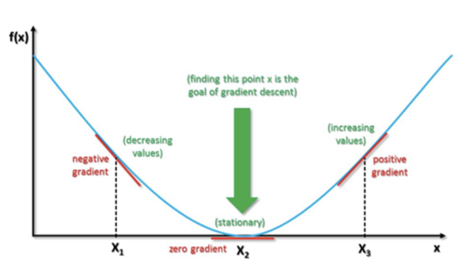

함수의 기울기를 구하여 기울기가 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복하는 것. 

해당함수의 최솟값 위치를 찾기 위해 비용함수의 경사 반대 방향으로 정의한 step size를 가지고 조금씩 움직여가면서 최적의 파라미터를 찾으려는 방법이다. 여기서 경사는 파라미터에 대해 편미분한 벡터를 의미하며, 이 파라미터를 반복적으로 조금씩 움직이는 것이 관건.

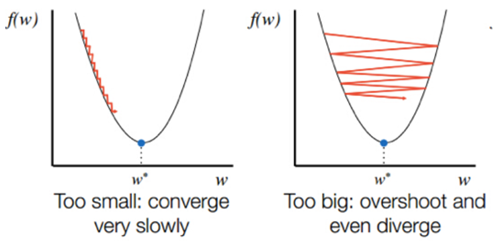

경사하강법에서는 학습시 스텝의 크기(step size)가 중요하다. 학습률이 너무 작을 경우 알고리즘이 수렵하기 위해 반복해야 하는 값이 많으므로 학습시간이 오래걸리낟. 그리고 지역 최솟값에 수렵할 수 있다 반대로 학습률이 너무 클수록 학습시간은 적게 걸리나 스텝이 너무 커서 전역 최소 값을 가로질러 반대편으로 건너 뛰어 최소값에서 멀어질 수도 있음

# 4.편향-분산 트레이드오프(Bias-Variance Trage off)

### 편향(Bias)

편향은 **지나치게 단순한 모델로 인한 error**이다. 편향이 크면 과**소적합(under-fitting)**을 야기한다. 모델에 편향이 크다는 것은 그 모델이 뭔가 중요한 요소를 놓치고 있다는 뜻이다. 

### 분산(Variance)

분산은 **지나치게 복잡한 모델로 인한 error**이다. 훈련데이터에 지나치게 적합시키려는 델이다. 분산이 크면 **과대적합**을 야기한다. 분산이 큰 모델은 훈련데이터에 지나치게 적합을 시켜 일반화가 되지 않은 모델이다.

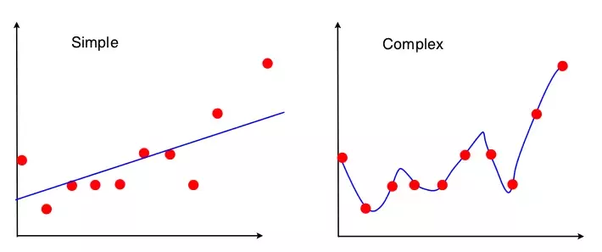

### 트레이드 오프

일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향. 편향이 높으면 분산은 낮아지고(과소적합), 분산이 높으면 편향이 낮아진다(과적합)
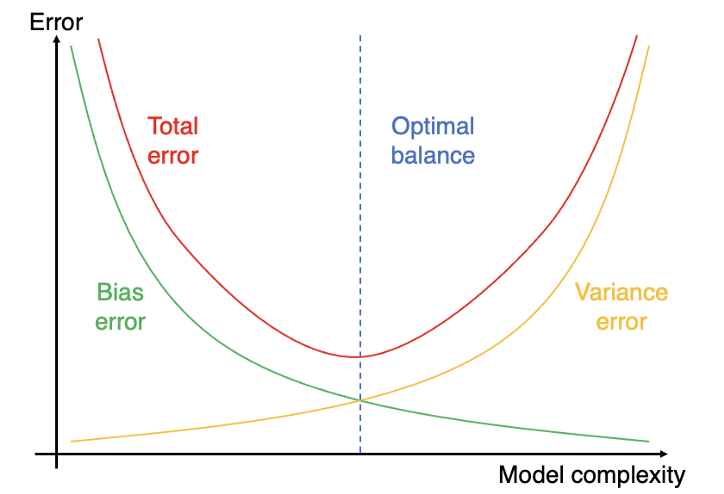


편향과 분산이 서로 트레이드오프를 이루면서 오류 cost값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 것이다.

# 로지스틱 회귀

로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘이다. 즉 로지스틱 회귀는 분류에 사용된다. 로지스틱 회귀 역시 선형 회귀 계열이다. 회귀가 선형,비선형인가는 독립변수가 아닌 가중치 변수가 선형인지 아닌지를 따른다. 로지스틱 회구가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라, 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 것. 

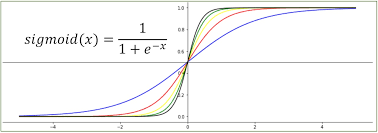

시그모이드 함수는 X값이 +,-로 아무리 커지거나 작아져도 y값은 항상 0과 1 사이 값을 반환. 

종양크기에 따라 악성이 될 확률이 높다고 한다면 종양크기를 X축, 악성종량 여부를 Y축에 표시해 S자 커브 형태의 시그모이드 함수를 이용해 좀더 정확히 0과 1에 대해 분류를 할 수 있다. 로지스틱 회귀는 이처럼 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀이다.

## 실습


In [ ]:
import seaborn as sns
iris=sns.load_dataset('iris')

X=iris.drop('species',axis=1)
y=iris['species']


In [ ]:
from sklearn.preprocessing import LabelEncoder

classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values)


In [ ]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression(C=200, random_state=11)  # C = 1/λ. 디폴트: L2, Auto.  
l_1=Logit.fit(X_train_std, y_train)
y_train_pred = Logit.predict(X_train_std)
y_test_pred = Logit.predict(X_test_std)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred))  
print(accuracy_score(y_test,y_test_pred)) 

0.9809523809523809
1.0


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_pred)) 

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


## 규제 실습

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
wine.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
wine.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']  # Column names
print('class label:', np.unique(wine['class label']))  # Class 출력
wine.head()

class label: [1 2 3]


,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split

X, y = wine.iloc[:,1:].values, wine.iloc[:,0].values
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
# Logistic Regression with L2 or L1 Regularization
from sklearn.linear_model import LogisticRegression
lr2_10 = LogisticRegression(penalty='l2', C=10.0, solver='saga')  
lr2_1 = LogisticRegression(penalty='l2', C=1.0, solver='saga')    
lr2_0_1 = LogisticRegression(penalty='l2', C=0.1, solver='saga')  

lr1_10 = LogisticRegression(penalty='l1', C=10.0, solver='saga')  
lr1_1 = LogisticRegression(penalty='l1', C=1.0, solver='saga')    
lr1_0_1 = LogisticRegression(penalty='l1', C=0.1, solver='saga') 

In [ ]:
# 규제화 방법(L2 or L1)과 규제강도(λ)를 바꿔가며 accuracy score 계산

import warnings
warnings.filterwarnings('ignore')

lr2_10.fit(X_train_std, y_train)
print('Training accuracy with L2 and λ=0.1:', lr2_10.score(X_train_std, y_train))
print('Test accuracy with L2 and λ=0.1:', lr2_10.score(X_test_std, y_test))
print("\n")

lr2_1.fit(X_train_std, y_train) 
print('Training accuracy with L2 and λ=1:', lr2_1.score(X_train_std, y_train))
print('Test accuracy with L2 and λ=1:', lr2_1.score(X_test_std, y_test))
print("\n")

lr2_0_1.fit(X_train_std, y_train)
print('Training accuracy with L2 and λ=10:', lr2_0_1.score(X_train_std, y_train))
print('Test accuracy with L2 and λ=10:', lr2_0_1.score(X_test_std, y_test))
print("\n")

lr1_10.fit(X_train_std, y_train)
print('Training accuracy with L1 and λ=0.1:', lr1_10.score(X_train_std, y_train))
print('Test accuracy with L1 and λ=0.1:', lr1_10.score(X_test_std, y_test))
print("\n")

lr1_1.fit(X_train_std, y_train)
print('Training accuracy with L1 and λ=1:', lr1_1.score(X_train_std, y_train))
print('Test accuracy with L1 and λ=1:', lr1_1.score(X_test_std, y_test))
print("\n")

lr1_0_1.fit(X_train_std, y_train)
print('Training accuracy with L1 and λ=10:', lr1_0_1.score(X_train_std, y_train))
print('Test accuracy with L1 and λ=10:', lr1_0_1.score(X_test_std, y_test))
print("\n")

Training accuracy with L2 and λ=0.1: 1.0
Test accuracy with L2 and λ=0.1: 0.9814814814814815


Training accuracy with L2 and λ=1: 1.0
Test accuracy with L2 and λ=1: 0.9814814814814815


Training accuracy with L2 and λ=10: 1.0
Test accuracy with L2 and λ=10: 1.0


Training accuracy with L1 and λ=0.1: 1.0
Test accuracy with L1 and λ=0.1: 0.9814814814814815


Training accuracy with L1 and λ=1: 1.0
Test accuracy with L1 and λ=1: 1.0


Training accuracy with L1 and λ=10: 0.967741935483871
Test accuracy with L1 and λ=10: 0.9444444444444444




In [ ]:
# L2 규제의 규제강도(C=1/λ)를 바꿔가며 계수 추정치 관찰
print(lr2_10.intercept_)
print(lr2_1.intercept_)
print(lr2_0_1.intercept_)

print(lr2_10.coef_)
print(lr2_1.coef_)
print(lr2_0_1.coef_)

[ 0.35516944  0.61486192 -0.97003135]
[ 0.28108783  0.60240922 -0.88349705]
[ 0.06872171  0.45700379 -0.5257255 ]
[[ 1.26471884  0.16198344  0.36223334 -1.53230151  0.0825366   0.49046963
   0.84500705 -0.24728197  0.05949072  0.17506031  0.04970809  0.96768902
   1.37696063]
 [-1.53411997 -0.45772302 -1.2329915   1.22037454 -0.30997684 -0.61039712
   0.85530221  0.39066484  0.41305144 -1.32892532  1.14219702  0.08131331
  -1.77737479]
 [ 0.26940113  0.29573958  0.87075816  0.31192697  0.22744024  0.1199275
  -1.70030925 -0.14338286 -0.47254216  1.15386501 -1.19190511 -1.04900233
   0.40041416]]
[[ 0.75503136  0.06162133  0.23396833 -0.89285526  0.02649098  0.29465804
   0.560276   -0.20734584  0.13386244  0.12731989  0.10192806  0.61762309
   0.90954963]
 [-0.98656777 -0.32324609 -0.65169325  0.6679954  -0.22946535 -0.20789923
   0.43824571  0.19875001  0.24373059 -0.78018691  0.63705861  0.08551674
  -1.03463077]
 [ 0.23153641  0.26162477  0.41772492  0.22485987  0.20297437 -0.086758

In [ ]:
# L1 규제의 규제강도(C=1/λ)를 바꿔가며 계수 추정치 관찰
print(lr1_10.intercept_)
print(lr1_1.intercept_)
print(lr1_0_1.intercept_)

print(lr1_10.coef_)
print(lr1_1.coef_)
print(lr1_0_1.coef_)

[ 0.32638831  0.60243286 -0.92882117]
[ 0.28667667  0.54519288 -0.83186955]
[ 0.05084681  0.30693142 -0.35777823]
[[ 1.222962    0.          0.20587884 -1.64816451  0.          0.23168329
   0.71371666 -0.09422671  0.          0.          0.          0.91806551
   1.46717665]
 [-1.82603141 -0.44518454 -1.48197157  1.06738457 -0.33811518 -0.44043423
   0.71636354  0.45839594  0.1635423  -1.43053471  1.12161157  0.
  -2.00049529]
 [ 0.07557229  0.10582165  0.74859562  0.05464411  0.12535956  0.
  -1.95757732  0.         -0.44307493  1.24367275 -1.23324446 -0.95600523
   0.00582153]]
[[ 0.02149736  0.          0.         -1.18165019  0.          0.
   0.02705956  0.          0.          0.          0.          0.62385193
   0.99062451]
 [-1.58950681 -0.14133217 -0.77307107  0.03823159 -0.07316734  0.
   0.          0.12813562  0.         -0.99049015  0.24408083  0.
  -1.20270962]
 [ 0.          0.          0.          0.          0.          0.
  -2.06610561  0.         -0.04340682  0.264

### 정규화 안한 데이터 훈련

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lr2_10.fit(X_train, y_train)
print('Training accuracy with L2 and λ=0.1:', lr2_10.score(X_train, y_train))
print('Test accuracy with L2 and λ=0.1:', lr2_10.score(X_test, y_test))
print("\n")

lr2_1.fit(X_train, y_train)  
print('Training accuracy with L2 and λ=1:', lr2_1.score(X_train, y_train))
print('Test accuracy with L2 and λ=1:', lr2_1.score(X_test, y_test))
print("\n")

lr2_0_1.fit(X_train, y_train)
print('Training accuracy with L2 and λ=10:', lr2_0_1.score(X_train, y_train))
print('Test accuracy with L2 and λ=10:', lr2_0_1.score(X_test, y_test))
print("\n")

lr1_10.fit(X_train, y_train)
print('Training accuracy with L1 and λ=0.1:', lr1_10.score(X_train, y_train))
print('Test accuracy with L1 and λ=0.1:', lr1_10.score(X_test, y_test))
print("\n")

lr1_1.fit(X_train, y_train)
print('Training accuracy with L1 and λ=1:', lr1_1.score(X_train, y_train))
print('Test accuracy with L1 and λ=1:', lr1_1.score(X_test, y_test))
print("\n")

lr1_0_1.fit(X_train, y_train)
print('Training accuracy with L1 and λ=10:', lr1_0_1.score(X_train, y_train))
print('Test accuracy with L1 and λ=10:', lr1_0_1.score(X_test, y_test))
print("\n")

Training accuracy with L2 and λ=0.1: 0.717741935483871
Test accuracy with L2 and λ=0.1: 0.6296296296296297


Training accuracy with L2 and λ=1: 0.717741935483871
Test accuracy with L2 and λ=1: 0.6296296296296297


Training accuracy with L2 and λ=10: 0.717741935483871
Test accuracy with L2 and λ=10: 0.6296296296296297


Training accuracy with L1 and λ=0.1: 0.717741935483871
Test accuracy with L1 and λ=0.1: 0.6296296296296297


Training accuracy with L1 and λ=1: 0.717741935483871
Test accuracy with L1 and λ=1: 0.6296296296296297


Training accuracy with L1 and λ=10: 0.7016129032258065
Test accuracy with L1 and λ=10: 0.6111111111111112




In [ ]:
print(lr2_10.intercept_)
print(lr2_1.intercept_)
print(lr2_0_1.intercept_)

print(lr2_10.coef_)
print(lr2_1.coef_)
print(lr2_0_1.coef_)

[-4.91984456e-04  4.73822898e-04  1.81615586e-05]
[-4.92040166e-04  4.76893132e-04  1.51470346e-05]
[-4.91769167e-04  4.75751271e-04  1.60178957e-05]
[[-0.00541497 -0.00177728 -0.00102054 -0.0134637  -0.03568832 -0.00018363
   0.00070816 -0.00032977 -0.00023374 -0.00256206 -0.00027218 -0.00026872
   0.00527036]
 [ 0.00435525 -0.00066217  0.00083606  0.01035441  0.02949565  0.00128594
   0.0017086   0.0001747   0.00101661 -0.0035433   0.00082581  0.00218362
  -0.00444332]
 [ 0.00105972  0.00243945  0.00018448  0.00310928  0.00619267 -0.00110231
  -0.00241676  0.00015507 -0.00078287  0.00610535 -0.00055363 -0.00191489
  -0.00082704]]
[[-0.00541239 -0.00178492 -0.00102102 -0.01347265 -0.03573491 -0.00018632
   0.00069499 -0.00032848 -0.0002356  -0.00254658 -0.00027281 -0.0002803
   0.00527859]
 [ 0.00438888 -0.00064726  0.00084225  0.01042342  0.02955815  0.00128757
   0.0017086   0.00017646  0.00101758 -0.0035472   0.0008253   0.00219015
  -0.00445503]
 [ 0.00102351  0.00243219  0.000178

In [ ]:
print(lr1_10.intercept_)
print(lr1_1.intercept_)
print(lr1_0_1.intercept_)

print(lr1_10.coef_)
print(lr1_1.coef_)
print(lr1_0_1.coef_)

[-4.92241265e-04  4.76644042e-04  1.55972226e-05]
[-4.91661546e-04  4.74659001e-04  1.70025455e-05]
[-4.96964286e-04  4.78422441e-04  1.85418449e-05]
[[-0.0054062  -0.00176861 -0.00101377 -0.01347961 -0.03568661 -0.00016854
   0.00070815 -0.00032247 -0.00022113 -0.00255548 -0.00026478 -0.00025635
   0.00527509]
 [ 0.00437384 -0.00064589  0.00083553  0.0104038   0.02948913  0.00127665
   0.00169422  0.0001704   0.00100459 -0.00354445  0.00082191  0.00217908
  -0.00444421]
 [ 0.00102534  0.00241719  0.00017123  0.00306879  0.00619045 -0.00110107
  -0.00240942  0.00014504 -0.00077641  0.00610698 -0.00055007 -0.00191568
  -0.00082387]]
[[-5.33628924e-03 -1.71082532e-03 -9.48464149e-04 -1.33888316e-02
  -3.57060474e-02 -1.13338235e-04  6.40853722e-04 -2.58973726e-04
  -1.61765585e-04 -2.47079988e-03 -2.01237511e-04 -1.95994675e-04
   5.29074457e-03]
 [ 4.29048276e-03 -6.22680514e-04  7.64726800e-04  1.02814191e-02
   2.95025622e-02  1.21741575e-03  1.63457083e-03  1.04557329e-04
   9.438288